
##<b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which property type is the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

We have analyze the given dataset well and We will not only findout the answers of the above questions but we will also find the answer of these questions -

*      Which type of room has the highest and lowest reviews and why?
*      Is there any other crucial factor for hosts than pricing? 

To get the answers of these questions, We're going to findout their most relevant answers.


Now we're going to explore it to understand the key understandings of the Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.shape

(48895, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# 1 - Data Cleaning


Our data has almost 48895 rows for 16 columns. These columns are important to understand the key understandings and to get answers for our questions but also some of these columns have not impact on the insights generated by these dataset.

So, we will drop these columns from the data but, We have to analyze each and every columns first so that we can findout which columns to drop.

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

After analyzing the dataset, We have got to know that every column is equally important for the most relevant insights from our dataset.




In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


As our dataset have almost ~49000 rows, It may possible to have some missing or wrong data in our dataset. Missing data and wrong data will definitely impact our key insights that we'll generate from our dataset. 

So, We'll check for the null values and wrong values in our dataset and drop them.

## Missing values

In [ ]:
(df.isnull().sum() * 100) / df.shape[0]

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

After analyzing the dataset, We got the following null rows for columns - 


1.   **0.0328%** data is missing for [name] column
2.   **20.56%** data is missing for [last_review] column
3.   **20.56%** data is missing for [reviews_per_month] column

A small percentage of data is missing for **[name]** column but we will completely ignore that data as properties name will not much impact on the key insights of our dataset.

While more than **20 percent** of data is missing for **[last_review , reviews_per_month]** column.

**20.55%** is much more data so we can not drop these rows as it will impact the key analysis of our dataset.

These two columns are dependent on each other because, If a property has atleast one review then that review's last date will show on the first column.

To take action at these null values, We had take a deep look at these columns data. 

After analyzing the data, What I'm thinking about these null values is, These are the reviews rows. So some of the property might be listed new who doesn't got any review till now.

So, Null value doesn't mean it is wrong data. It may be right data as these properties may also be new who doesn't have any single review now.

There were **two unique ID's** available in our dataframe so we will remove these ID as our dataset already have index no which again providing the unique value for the properties.

We're also removing the **last_review column** as it is not that much important for finding the insights. 

In [ ]:
df= df.drop(['last_review', 'host_id', 'id'],axis=1)

In [ ]:
# review_per_month have null values we can replace it with 0
df['reviews_per_month']=df['reviews_per_month'].replace(to_replace=np.nan,value=0).astype('int64')

In [ ]:
df.dtypes

name                               object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                   int64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Checking Price feature For Outliers/Wrong Data

Price is the most crucial factor for our dataset. Different properties have different pricing. They may variate in pricing from location to location.

But no one wanted to list there properties at **0 cost** (Atleast we're assuming this)

So, We're checking the price of the property. If any property price = 0 then we assume that these entries are wrong and we will remove that rows.

In [ ]:
df[df['price'] == 0]

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23161,"Huge Brooklyn Brownstone Living, Close to it all.",Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0,4,28
25433,★Hostel Style Room | Ideal Traveling Buddies★,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2,4,127
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0,5,0
25753,"Sunny, Quiet Room in Greenpoint",Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0,2,0
25778,Modern apartment in the heart of Williamsburg,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0,1,73
25794,Spacious comfortable master bedroom with nice ...,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4,6,176
25795,Contemporary bedroom in brownstone with nice view,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4,6,232
25796,Cozy yet spacious private brownstone bedroom,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4,6,222
26259,the best you can find,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0,1,0
26841,Coliving in Brooklyn! Modern design / Shared room,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,0,6,333


In [ ]:
# Dropping the rows where price = 0

temp_rows = df.index[df['price'] == 0].tolist()

In [ ]:
df.drop(temp_rows, inplace=True)

In [ ]:
df.shape

(48884, 13)

## 1. Removing Outliers From The Dataset

Checking for outliers in numerical column like price, minimum_nights, number_of_reviews

In [ ]:
df["price"].value_counts()

100     2051
150     2047
50      1534
60      1458
200     1401
        ... 
2010       1
1485       1
822        1
539        1
1880       1
Name: price, Length: 673, dtype: int64

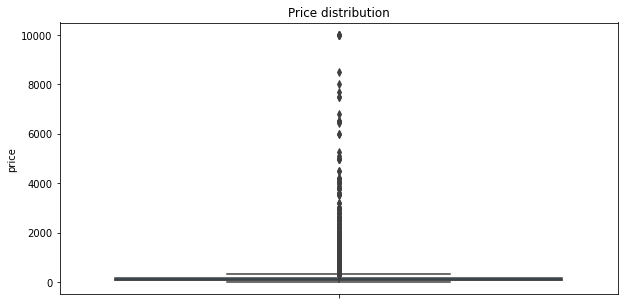

In [ ]:
plt.figure(figsize=(10,5))
vio_plt=sns.boxplot(data=df, y='price')
vio_plt.set_title('Price distribution')
plt.show()

There is outliers in price, we have to remove this so we will use Interquartile range (middle 50% =Q3-Q1) method to do the operation.

In [ ]:
def outlier_removal(data_col):
 data_col = sorted(data_col)
 Q1,Q3 = np.percentile(data_col, [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 
 return lower_range,upper_range

In [ ]:
lower_bound,upper_bound = outlier_removal(df['price'])

In [ ]:
df1 = df[(df.price>lower_bound) & (df.price<upper_bound)]

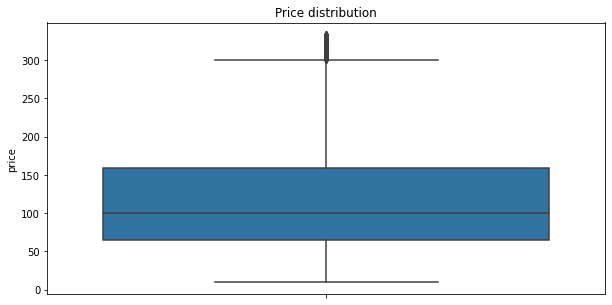

In [ ]:
plt.figure(figsize=(10,5))
vio_plt=sns.boxplot(data=df1, y='price')
vio_plt.set_title('Price distribution')
plt.show()

We're now checking the outliers in the ***minimum_nights*** column

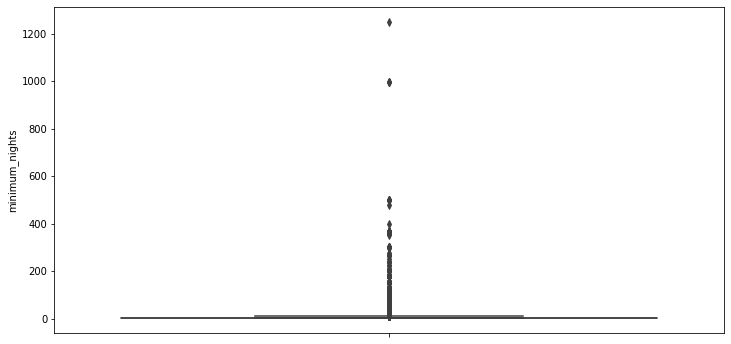

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot(y = 'minimum_nights', data = df1)

There are some properties who offer minimum of more than 1000 Nights. It may be right according to host but these properties can effect the overall accuracy of our dataset so we will remove these properties.

In [ ]:
df1 = df1[df1['minimum_nights'] < 999]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45903 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            45903 non-null  object 
 1   host_name                       45903 non-null  object 
 2   neighbourhood_group             45903 non-null  object 
 3   neighbourhood                   45903 non-null  object 
 4   latitude                        45903 non-null  float64
 5   longitude                       45903 non-null  float64
 6   room_type                       45903 non-null  object 
 7   price                           45903 non-null  int64  
 8   minimum_nights                  45903 non-null  int64  
 9   number_of_reviews               45903 non-null  int64  
 10  reviews_per_month               45903 non-null  int64  
 11  calculated_host_listings_count  45903 non-null  int64  
 12  availability_365                

Data cleaning is completed now, We have left 45903 rows and 13 columns which are enough to get insights from our dataset.

Now, we'll explore our dataset to get the some wonderful key understandings.



# 2 - (Exploratory Data Analysis) EDA Start...


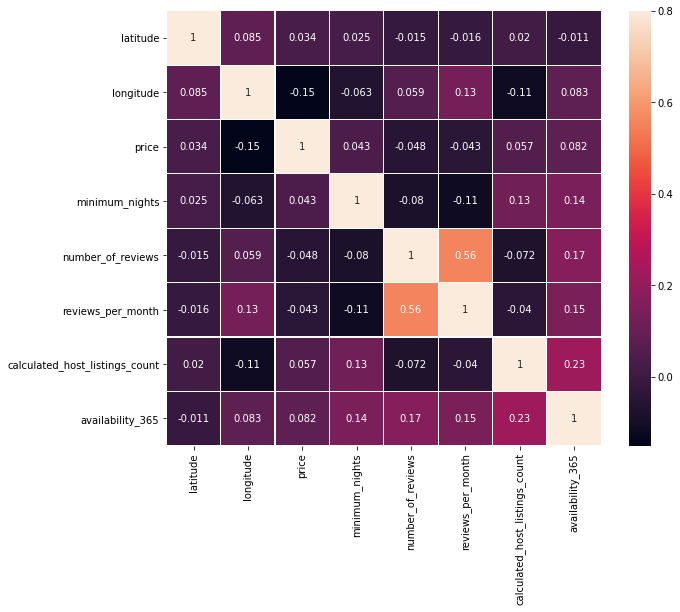

In [ ]:
#correlation matrix (to check relation between features)
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, linewidth = 0.2)

We're getting some positive as well as negative corelation between various features.




## Which Host has highest no. of Properties

In [ ]:
#Top 10 hosts with most no of properties in entire NYC

top_10_hosts=df['host_name'].value_counts()[:10] 
top_10_hosts

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

Text(0.5, 1.0, 'Top 10 Hosts on the basis of Total Listings in Entire NYC!')

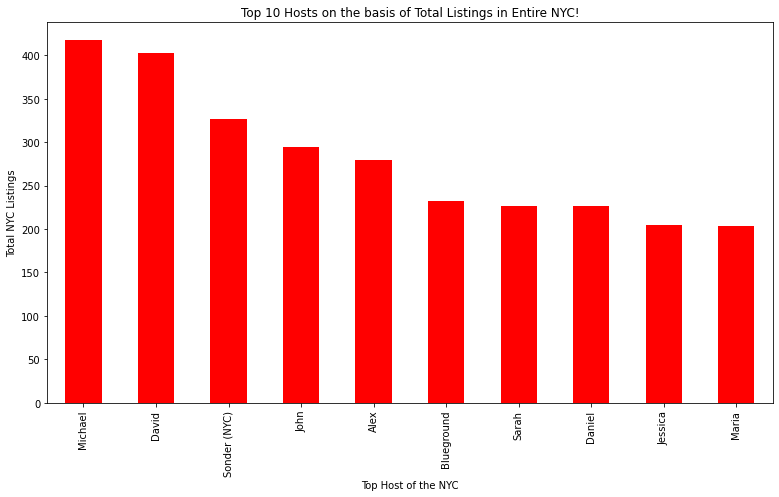

In [ ]:
top_10_hosts.plot(kind='bar',color='red', figsize = (13,7))
plt.xlabel('Top Host of the NYC')
plt.ylabel('Total NYC Listings')
plt.title('Top 10 Hosts on the basis of Total Listings in Entire NYC!')

Here Michael is the top host with 417 properties now, We will explore some more data about Michael.